In [1]:
from sys import argv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

In [5]:
ebov_1 = pd.read_csv('~/Desktop/MachineLearningPython/scripps-data/EBOV-Cyno-Aero-1.csv-Table 1.csv')
ebov_1_e1001 = ebov_1[ebov_1['SubjectName'] == 'e1001']
ebov_1_e1001.tail()

,Day,Time,TimeS,Study,SubjectName,AOPAMean_Mean,AOPAMean_Q25,AOPAMean_Q75,AOPDiastolic_Mean,AOPDiastolic_Q25,...,RR_Mean,RR_Q25,RR_Q75,RespMean_Mean,RespMean_Q25,RespMean_Q75,Temp_Mean,Temp_Q25,Temp_Q75,Y
2189,5,4:32,1081800,EBOV-Cyno-Aero-1,e1001,-3.013829,-3.063296,-2.861012,-2.731710,-2.787810,...,-2.640143,-2.656941,-2.621236,0.814572,0.668771,0.988209,1.937441,1.408415,2.473706,1
2190,5,5:02,1083600,EBOV-Cyno-Aero-1,e1001,-2.695266,-2.797572,-2.603549,-2.129612,-2.221683,...,-2.875314,-2.921459,-2.822745,0.645589,0.597009,0.773228,0.603864,0.361765,0.881471,1
2191,5,5:32,1085400,EBOV-Cyno-Aero-1,e1001,-4.287727,-4.576029,-4.111410,-3.720096,-4.012676,...,-2.747939,-2.788457,-2.721265,0.767632,0.671824,0.871642,-0.531999,-0.610344,-0.463749,1
2192,5,6:02,1087200,EBOV-Cyno-Aero-1,e1001,-3.315938,-3.566408,-3.050376,-2.994014,-3.252351,...,-2.675469,-2.755794,-2.590157,0.648187,0.451185,0.903151,-2.110040,-2.942447,-1.297780,1
2193,5,6:32,1089000,EBOV-Cyno-Aero-1,e1001,-2.562841,-2.605825,-2.511493,-2.273401,-2.346013,...,-2.919935,-2.942372,-2.887650,0.608120,0.615313,1.048819,-2.441758,-3.791866,-2.325330,1


**Note**: Time step is one second.

Text(0.5, 1.0, 'Days of Study, Reset at Exposure Period')

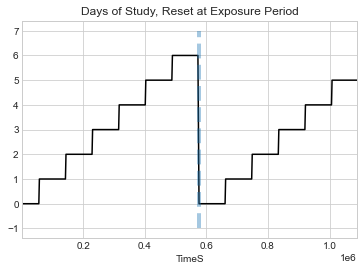

In [6]:
ebov_1_e1001.plot(x='TimeS', y='Day', color='black', legend=False)
num_days = len(np.unique(ebov_1_e1001['Day']))
first_exposed = ebov_1_e1001.loc[ebov_1_e1001.Y == 1]['TimeS'].to_list()[0]
plt.plot([first_exposed, first_exposed], [ebov_1_e1001['Day'][0] - 1, num_days], lw=4, alpha=0.4, ls='--')
plt.title("Days of Study, Reset at Exposure Period")

# Get Sampling Frequencies

In [7]:
sampling_freqs = []
exposed = []
days = []

for i in range(0, 2):
    for day in np.unique(ebov_1_e1001.Day):
        num_obvs = len(ebov_1_e1001.loc[ebov_1_e1001.Y == i]
        .loc[ebov_1_e1001.Day == day])
        days.append(day)
        exposed.append(i)
        sampling_freqs.append(num_obvs)

sampling_freqs = pd.DataFrame(list(zip(days, exposed, sampling_freqs)), columns=['Day', 'Exposed', 'Sampling Frequency'])
sampling_freqs = sampling_freqs[sampling_freqs['Sampling Frequency'] != 0]
sampling_freqs

,Day,Exposed,Sampling Frequency
0,0,0,31
1,1,0,48
2,2,0,48
3,3,0,48
4,4,0,48
5,5,0,48
6,6,0,47
7,0,1,48
8,1,1,48
9,2,1,48


Average Sampling Frequency for Non-Exposure:
45.43
Average Sampling Frequency for Exposure:
47.67


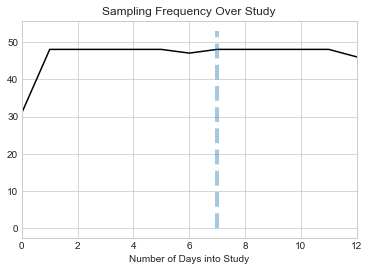

In [8]:
sampling_freqs.plot(y='Sampling Frequency', legend=False, color='black')
exposed_start = sampling_freqs.loc[sampling_freqs['Exposed'] == 1].index[0]
plt.plot([exposed_start, exposed_start], [0, max(sampling_freqs['Sampling Frequency'] + 5)], lw=4, alpha=0.4, ls='--')
plt.title('Sampling Frequency Over Study')
plt.xlabel('Number of Days into Study')

print('Average Sampling Frequency for Non-Exposure:')
print(round(np.mean((sampling_freqs.loc[sampling_freqs.Exposed == 0])['Sampling Frequency']), 2))
print('Average Sampling Frequency for Exposure:')
print(round(np.mean((sampling_freqs.loc[sampling_freqs.Exposed == 1])['Sampling Frequency']), 2))

# Get Summary Statistics

In [9]:
ebov_1_e1001.drop(['Day', 'TimeS'], axis=1).describe()

,AOPAMean_Mean,AOPAMean_Q25,AOPAMean_Q75,AOPDiastolic_Mean,AOPDiastolic_Q25,AOPDiastolic_Q75,AOPSystolic_Mean,AOPSystolic_Q25,AOPSystolic_Q75,Activity_Mean,...,RR_Mean,RR_Q25,RR_Q75,RespMean_Mean,RespMean_Q25,RespMean_Q75,Temp_Mean,Temp_Q25,Temp_Q75,Y
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,...,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,-0.367097,-0.672454,-0.057007,-0.314980,-0.650381,0.028208,-0.443702,-0.735430,-0.143593,-0.002759,...,-0.487462,-0.994980,0.044415,0.159649,-0.286774,0.619641,2.335933,2.102424,2.575604,0.473510
std,1.153460,1.082554,1.277928,1.065980,1.009006,1.186007,1.269154,1.191342,1.395743,0.088416,...,1.083047,1.009972,1.286576,0.671994,0.704866,0.782955,4.675731,4.668522,4.703037,0.499712
min,-5.948436,-6.051168,-5.847156,-4.899900,-5.002803,-4.800353,-6.933966,-7.021724,-6.837169,-1.510156,...,-5.877061,-5.915692,-5.846566,-1.375384,-1.711390,-1.097267,-5.987851,-6.002681,-5.953106,0.000000
25%,-0.877639,-1.265657,-0.674003,-0.870793,-1.240956,-0.619271,-0.939050,-1.252276,-0.727594,-0.002393,...,-0.943447,-1.499405,-0.552136,-0.333964,-0.774999,-0.003126,-0.176313,-0.411503,0.022408,0.000000
50%,-0.180319,-0.541757,0.147091,-0.157042,-0.524895,0.215259,-0.207990,-0.538405,0.108039,0.002215,...,-0.194324,-0.915074,0.515639,0.043983,-0.474525,0.632401,0.729486,0.560977,0.960922,0.000000
75%,0.391727,0.040396,0.781550,0.401017,0.036240,0.804357,0.353175,0.029747,0.773907,0.009299,...,0.248934,-0.426732,0.907952,0.615890,0.054799,1.125715,2.419845,2.261982,2.747375,1.000000
max,2.199801,1.947262,2.842548,2.175340,1.865726,2.645959,2.766893,1.909362,4.403056,0.093662,...,1.423482,1.295075,1.998353,2.957038,2.634353,3.666424,22.616552,22.381184,22.782265,1.000000


# Get Sampling Info for All of Subjects - Is it consistent?

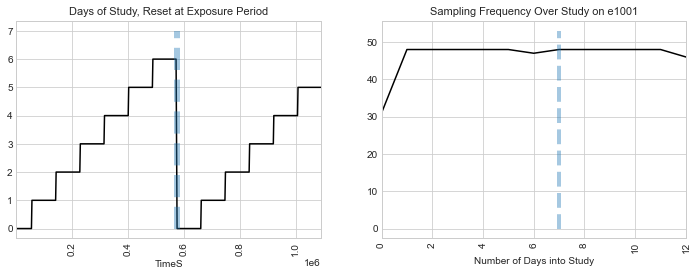

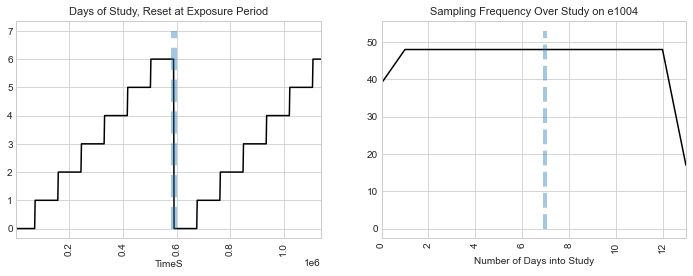

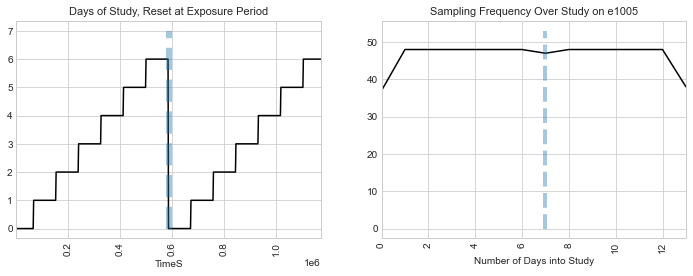

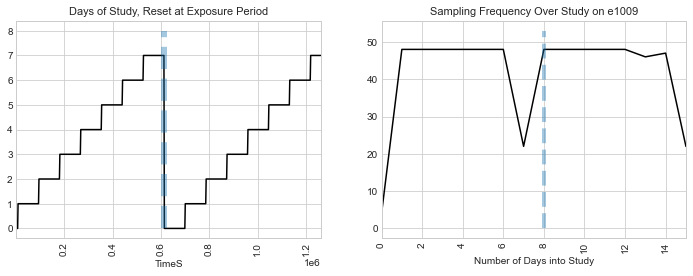

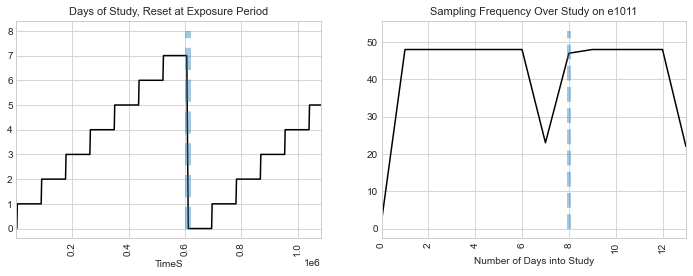

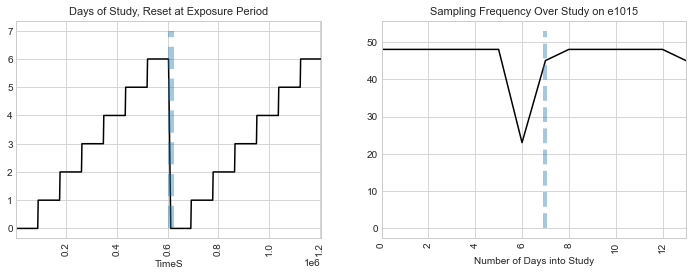

In [10]:
def sampling_analysis(subject):
    ebov_1_subj = ebov_1[ebov_1['SubjectName'] == subject]

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    num_days = len(np.unique(ebov_1_subj['Day']))
    first_exposed = ebov_1_subj.loc[ebov_1_subj.Y == 1]['TimeS'].to_list()[0]
    ebov_1_subj.plot(x='TimeS', y='Day', color='black', legend=False, subplots=True, ax=ax[0], rot=90)
    ax[0].plot([first_exposed, first_exposed], [0, num_days], lw=6, alpha=0.4, ls='--')
    ax[0].set_title("Days of Study, Reset at Exposure Period", fontsize=11)

    sampling_freqs = []
    exposed = []
    days = []

    for i in range(0, 2):
        for day in np.unique(ebov_1_subj.Day):
            num_obvs = len(ebov_1_subj.loc[ebov_1_subj.Y == i]
            .loc[ebov_1_subj.Day == day])
            days.append(day)
            exposed.append(i)
            sampling_freqs.append(num_obvs)

    sampling_freqs = pd.DataFrame(list(zip(days, exposed, sampling_freqs)), columns=['Day', 'Exposed', 'Sampling Frequency'])
    sampling_freqs = sampling_freqs[sampling_freqs['Sampling Frequency'] != 0]

    sampling_freqs.plot(y='Sampling Frequency', legend=False, color='black', subplots=True, ax=ax[1])
    exposed_start = sampling_freqs.loc[sampling_freqs['Exposed'] == 1].index[0]
    ax[1].plot([exposed_start, exposed_start], [0, max(sampling_freqs['Sampling Frequency'] + 5)], lw=4, alpha=0.4, ls='--')
    plt.xticks(rotation=90)
    plt.xlabel('Number of Days into Study')
    ax[1].set_title('Sampling Frequency Over Study on ' + subject, fontsize=11)

subjects = list(np.unique(ebov_1['SubjectName']))
for subject in subjects:
    sampling_analysis(subject)

## Observations
* All studies went on for eight days, but the sampling frequencies are not the same, as the seconds of data collection for some subjects are greater than others.
* The number of days actually reset at the exposure period.
* Most data collection starts at Day 0, other data collection at Day 1.
* All reset back to Day 0.
* The sampling frequency stays relatively consistent, save for considerable dips before the exposure period in the last three subjects.
    * We can maybe fill in the gaps with missing data, and the number of the gaps we can fill can depend on the median of the sampling frequency for the subject.

In [11]:
time_steps = []
exposed_at = []

for subject in subjects:
    time_steps.append(max(ebov_1[ebov_1['SubjectName'] == subject]['TimeS']))
    exposed_at.append(min(ebov_1[(ebov_1['SubjectName'] == subject) & (ebov_1['Y'] == 1)]['TimeS']))

exposed_when = [i / j for i, j in zip(exposed_at, time_steps)]

length_exposed_df = pd.DataFrame(list(zip(subjects, time_steps, exposed_at, exposed_when)), columns=['SubjectName', 'Num_TimeS', 'TimeS_Exposed', 'StudyProgress_Exposed'])
length_exposed_df = length_exposed_df.set_index('SubjectName')
length_exposed_df

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
SubjectName,,,
e1001,1089000,576000,0.528926
e1004,1137600,590400,0.518987
e1005,1171800,586800,0.500768
e1009,1260000,613800,0.487143
e1011,1081800,612000,0.565724
e1015,1204200,612000,0.508221


In [12]:
length_exposed_df.describe()

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
count,6.000000e+00,6.000000,6.000000
mean,1.157400e+06,598500.000000,0.518295
std,6.886265e+04,16169.972171,0.027357
min,1.081800e+06,576000.000000,0.487143
25%,1.101150e+06,587700.000000,0.502631
50%,1.154700e+06,601200.000000,0.513604
75%,1.196100e+06,612000.000000,0.526441
max,1.260000e+06,613800.000000,0.565724


Text(0.5, 1.0, '# of Timesteps and Exposure Point for Each Subject')

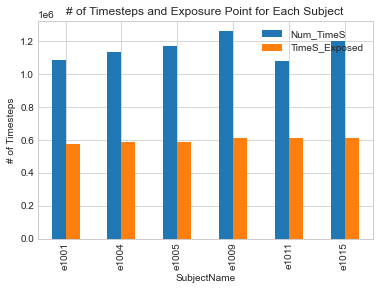

In [13]:
length_exposed_df.plot(y=['Num_TimeS', 'TimeS_Exposed'], kind='bar')
plt.ylabel('# of Timesteps')
plt.title('# of Timesteps and Exposure Point for Each Subject')


## Observations
* The lengths of the studies for each subject are not consistent.
    * e1009's study went on the longest. It went also went on for more days, but there was a big dip in sampling frequency before the exposure period.
        * Overall, the longer studies had the bigger dips in sampling frequency before exposure.
    * e1001's study was the shortest. Its sampling frequency is almost perfectly consistent.
* All subjects were exposed to the Ebola virus around halfway into the study. 
    * Not perfectly halfway likely because it wasn't known for each subject how much data would be collected on a given day